# Data Processing

In [3]:
# Basic Libraries

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import torch

In [4]:
# Load Datasets

# Gold Futures
GLD_df = pd.read_csv('../Data/Raw/Commodities/GLD Historical Data.csv')

# Market Indexes
NASDAQ_df = pd.read_csv('../Data/Raw/Indexes/NASDAQ Composite Historical Data.csv')
DJIA_df = pd.read_csv('../Data/Raw/Indexes/Dow Jones Industrial Average Historical Data.csv')
SP500_df = pd.read_csv('../Data/Raw/Indexes/S&P 500 Historical Data.csv')
DAX_df = pd.read_csv('../Data/Raw/Indexes/DAX Historical Data.csv')
FTSE_df = pd.read_csv('../Data/Raw/Indexes/FTSE 100 Historical Data.csv')
NK255_df = pd.read_csv('../Data/Raw/Indexes/Nikkei 225 Historical Data.csv')
HSI_df = pd.read_csv('../Data/Raw/Indexes/Hang Seng Historical Data.csv')
CSI300_df = pd.read_csv('../Data/Raw/Indexes/Shanghai Shenzhen CSI 300 Historical Data.csv')

# ETFs
AGG_df = pd.read_csv('../Data/Raw/ETFs/AGG Historical Data.csv')
EEM_df = pd.read_csv('../Data/Raw/ETFs/EEM Historical Data.csv')
TIP_df = pd.read_csv('../Data/Raw/ETFs/TIP Historical Data.csv')
XLP_df = pd.read_csv('../Data/Raw/ETFs/XLP Historical Data.csv')

# Bond Yields
#BY3M_df = pd.read_csv('../Data/Raw/Bond Yields/United States 3-Month Bond Yield Historical Data.csv') # Contains zeroes!
BY2Y_df = pd.read_csv('../Data/Raw/Bond Yields/United States 2-Year Bond Yield Historical Data.csv')
BY5Y_df = pd.read_csv('../Data/Raw/Bond Yields/United States 5-Year Bond Yield Historical Data.csv')
BY10Y_df = pd.read_csv('../Data/Raw/Bond Yields/United States 10-Year Bond Yield Historical Data.csv')
BY30Y_df = pd.read_csv('../Data/Raw/Bond Yields/United States 30-Year Bond Yield Historical Data.csv')

# FX Data
USDCAD_df = pd.read_csv('../Data/Raw/FX/USD_CAD Historical Data.csv')
USDCHF_df = pd.read_csv('../Data/Raw/FX/USD_CHF Historical Data.csv')
USDCNY_df = pd.read_csv('../Data/Raw/FX/USD_CNY Historical Data.csv')
USDHKD_df = pd.read_csv('../Data/Raw/FX/USD_HKD Historical Data.csv')
USDSGD_df = pd.read_csv('../Data/Raw/FX/USD_SGD Historical Data.csv')

# Commodities
BRENT_df = pd.read_csv('../Data/Raw/Commodities/Brent Oil Futures Historical Data.csv')
WTI_df = pd.read_csv('../Data/Raw/Commodities/Crude Oil WTI Futures Historical Data.csv')
GOLD_df = pd.read_csv('../Data/Raw/Commodities/Gold Futures Historical Data.csv')
SILVER_df = pd.read_csv('../Data/Raw/Commodities/Silver Futures Historical Data.csv')
COPPER_df = pd.read_csv('../Data/Raw/Commodities/Copper Futures Historical Data.csv')

In [5]:
# Add Asset Labels

GLD_df.insert(0, "Asset",'GLD')

NASDAQ_df.insert(0, "Asset",'NASDAQ')
DJIA_df.insert(0, "Asset",'DJIA')
SP500_df.insert(0, "Asset",'SP500')
DAX_df.insert(0, "Asset",'DAX')
FTSE_df.insert(0, "Asset",'FTSE')
NK255_df.insert(0, "Asset",'NK255')
HSI_df.insert(0, "Asset",'HSI')
CSI300_df.insert(0, "Asset",'CSI300')

AGG_df.insert(0, "Asset",'AGG')
EEM_df.insert(0, "Asset",'EEM')
TIP_df.insert(0, "Asset",'TIP')
XLP_df.insert(0, "Asset",'XLP')

# BY3M_df.insert(0, "Asset",'BY3M')
BY2Y_df.insert(0, "Asset",'BY2Y')
BY5Y_df.insert(0, "Asset",'BY5Y')
BY10Y_df.insert(0, "Asset",'BY10Y')
BY30Y_df.insert(0, "Asset",'BY30Y')

USDCAD_df.insert(0, "Asset",'USDCAD')
USDCHF_df.insert(0, "Asset",'USDCHF')
USDCNY_df.insert(0, "Asset",'USDCNY')
USDHKD_df.insert(0, "Asset",'USDHKD')
USDSGD_df.insert(0, "Asset",'USDSGD')

BRENT_df.insert(0, "Asset",'BRENT')
WTI_df.insert(0, "Asset",'WTI')
GOLD_df.insert(0, "Asset",'GOLD')
SILVER_df.insert(0, "Asset",'SILVER')
COPPER_df.insert(0, "Asset",'COPPER')


In [6]:
# Concatenate Dataframes
input_df = pd.concat([GLD_df,
                      NASDAQ_df,DJIA_df,SP500_df,DAX_df,FTSE_df,NK255_df,HSI_df,CSI300_df,
                      AGG_df,EEM_df,TIP_df,XLP_df,
                      BY2Y_df,BY5Y_df,BY10Y_df,BY30Y_df,
                      USDCAD_df,USDCHF_df,USDCNY_df,USDHKD_df,USDSGD_df,
                      BRENT_df,WTI_df,GOLD_df,SILVER_df,COPPER_df])

In [7]:
# Convert Dates to Datetimes
input_df['Date'] = pd.to_datetime(input_df['Date'],format="%m/%d/%Y")

# Remove the commas in prices
input_df['Price'] = pd.to_numeric(input_df['Price'].astype(str).str.replace(',',''))
input_df['Open'] = pd.to_numeric(input_df['Open'].astype(str).str.replace(',', ''))
input_df['High'] = pd.to_numeric(input_df['High'].astype(str).str.replace(',', ''))
input_df['Low'] = pd.to_numeric(input_df['Low'].astype(str).str.replace(',', ''))

# Drop the volume column
input_df = input_df.drop(columns=['Vol.'])

# Convert Change Percentage to Return
input_df['Change %'] = input_df['Change %'].str.rstrip('%').astype('float') / 100.0
input_df = input_df.rename(columns={'Change %': 'Return'})

# Sort by Dates
input_df = input_df.sort_values(by='Date', ascending=True)

In [8]:
# Pivot Assets and make Date the Index
finance_df = input_df.pivot(index='Date', columns='Asset')

# Combine Asset names and variable names
finance_df.columns = finance_df.columns.swaplevel(0, 1)
finance_df.sort_index(axis=1, level=0, inplace=True)
finance_df.columns = ['_'.join(col).strip() for col in finance_df.columns.values]

# Isolate Gold Futures columns
GLD_col = [col for col in finance_df if col.startswith('GLD_')]
GLD_col_df = finance_df[GLD_col]

# Move GLD columns to the start of the Dataframe
finance_df = finance_df.drop(columns=GLD_col)
finance_df = GLD_col_df.join(finance_df)

# Remove rows for which GLD data is not present
finance_df = finance_df.dropna(subset=GLD_col)

# Forward fill missing data
finance_df = finance_df.ffill(axis = 0)

# Remove first row to eliminate missing data
finance_df = finance_df[1:]

finance_df

,GLD_High,GLD_Low,GLD_Open,GLD_Price,GLD_Return,AGG_High,AGG_Low,AGG_Open,AGG_Price,AGG_Return,...,WTI_High,WTI_Low,WTI_Open,WTI_Price,WTI_Return,XLP_High,XLP_Low,XLP_Open,XLP_Price,XLP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,42.91,42.46,42.80,42.74,-0.0065,102.50,102.07,102.46,102.30,-0.0010,...,44.13,41.85,42.18,43.91,0.0425,23.18,22.87,23.01,23.00,-0.0035
2005-01-05,42.88,42.60,42.75,42.67,-0.0016,102.35,102.06,102.20,102.26,-0.0004,...,44.00,42.60,43.90,43.39,-0.0118,23.03,22.88,23.00,22.88,-0.0052
2005-01-06,42.56,42.07,42.48,42.15,-0.0122,102.37,102.18,102.29,102.33,0.0007,...,45.75,42.80,43.39,45.56,0.0500,23.07,22.83,22.98,22.99,0.0048
2005-01-07,42.39,41.70,42.09,41.84,-0.0074,102.44,102.11,102.39,102.30,-0.0003,...,46.10,44.75,45.50,45.43,-0.0029,23.17,22.98,23.10,23.10,0.0048
2005-01-10,42.07,41.89,41.99,41.95,0.0026,102.32,102.10,102.32,102.25,-0.0005,...,47.30,45.20,45.60,45.33,-0.0022,23.34,23.05,23.20,23.24,0.0061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-20,180.09,179.22,180.06,179.75,-0.0104,98.50,98.17,98.28,98.32,0.0018,...,72.09,69.65,71.45,70.50,-0.0114,74.28,73.56,74.05,73.58,-0.0146
2023-06-21,179.95,178.19,179.15,179.49,-0.0014,98.53,97.97,98.09,98.48,0.0016,...,72.72,70.80,70.90,72.53,0.0288,74.08,73.26,73.54,73.84,0.0035
2023-06-22,178.99,177.63,178.36,177.71,-0.0099,98.32,97.92,98.17,97.97,-0.0052,...,72.65,68.93,72.43,69.51,-0.0416,74.38,73.98,74.22,74.27,0.0058


In [9]:
# Add target price and diff columns
finance_df.insert(0,'price',finance_df['GLD_Price'].shift(-1))
finance_df.insert(1,'diff',finance_df['GLD_Price'].diff().shift(-1))

# Restrict to before June 2023
finance_df = finance_df[finance_df.index<'2023-06-01']

finance_df

,price,diff,GLD_High,GLD_Low,GLD_Open,GLD_Price,GLD_Return,AGG_High,AGG_Low,AGG_Open,...,WTI_High,WTI_Low,WTI_Open,WTI_Price,WTI_Return,XLP_High,XLP_Low,XLP_Open,XLP_Price,XLP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,42.67,-0.07,42.91,42.46,42.80,42.74,-0.0065,102.50,102.07,102.46,...,44.13,41.85,42.18,43.91,0.0425,23.18,22.87,23.01,23.00,-0.0035
2005-01-05,42.15,-0.52,42.88,42.60,42.75,42.67,-0.0016,102.35,102.06,102.20,...,44.00,42.60,43.90,43.39,-0.0118,23.03,22.88,23.00,22.88,-0.0052
2005-01-06,41.84,-0.31,42.56,42.07,42.48,42.15,-0.0122,102.37,102.18,102.29,...,45.75,42.80,43.39,45.56,0.0500,23.07,22.83,22.98,22.99,0.0048
2005-01-07,41.95,0.11,42.39,41.70,42.09,41.84,-0.0074,102.44,102.11,102.39,...,46.10,44.75,45.50,45.43,-0.0029,23.17,22.98,23.10,23.10,0.0048
2005-01-10,42.21,0.26,42.07,41.89,41.99,41.95,0.0026,102.32,102.10,102.32,...,47.30,45.20,45.60,45.33,-0.0022,23.34,23.05,23.20,23.24,0.0061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,180.20,-1.75,183.54,181.77,183.54,181.95,-0.0081,98.19,97.82,98.17,...,74.73,73.13,73.77,74.34,0.0196,74.30,73.68,74.25,73.74,-0.0065
2023-05-25,180.92,0.72,181.31,180.10,181.18,180.20,-0.0096,97.80,97.44,97.74,...,74.37,70.98,74.21,71.83,-0.0338,73.44,72.63,73.09,73.18,-0.0076
2023-05-26,182.04,1.12,181.30,180.09,181.01,180.92,0.0040,97.59,97.24,97.36,...,73.05,71.49,71.89,72.67,0.0117,73.54,72.86,73.11,73.43,0.0034


# Target Data

In [11]:
target_df = finance_df[['price','diff']].copy()

target_df['up_down'] = np.where(target_df['diff']>0.0,1,0)

target_df

,price,diff,up_down
Date,,,
2005-01-04,42.67,-0.07,0
2005-01-05,42.15,-0.52,0
2005-01-06,41.84,-0.31,0
2005-01-07,41.95,0.11,1
2005-01-10,42.21,0.26,1
...,...,...,...
2023-05-24,180.20,-1.75,0
2023-05-25,180.92,0.72,1
2023-05-26,182.04,1.12,1


In [12]:
# Remove target columns from finance_df

finance_df = finance_df.drop(columns=['price', 'diff'])

# Technical Indicators

Looking at the below technical indicators:

### Moving Averages

The SMA (Simple moving average) or EMA (Exponential moving average) cannot be used on their own to predict price movements. A threshold price that may be useful in one period of time will not be useful in the fture as the equilibrium price will likely drift. The same can therfore be said for these price averages.

Instead price movements could predicted by comparing a short period moving average against a longer term moving average. If the short term average is higher then the asset is overpriced and vice-versa. We could consider using a difference like this as an input but I think the following indicators will be more useful based on my research.

$SMA_{n}(t) = (\sum_{i=t}^{t-n} x_i)/n$

$EMA_{n}(t) = \alpha x_t + (1-\alpha)EMA_{n}(t-1)$

where, $x_t$ is the price today, $n$ is the number of days chosen to look back over, and $\alpha = \frac{2}{1+n}$

### The Standard deviation

This is a generally useful metric for the volatility of the asset over the chosen period and should hold some predictive capability for example to distinguish between short term price defects and long term trends.

$\sigma_n(t) = \sum_{i=t}^{t-n} x_i - \bar{x}_n$

where $\bar{x}$ is the mean over the window of $n$ days.

### Price deviation

This may be useful in identifying short term defects in the price. The idea here is to show how much the current price deviates from the average based on its current volatility.

$z_n(t) = (x_t - \bar{x}_n)/\sigma_n(t)$

### RSI (Relative strength index)

The RSI is our first momentum indicator. It gives a score between 0-100. Here is a quote from Investopedia: "Simply put, the RSI forecasts sooner than almost anything else an upcoming reversal of a trend, either up or down."

The RSI takes the average of increases over the average of decreases for a given period. If they are equal it is 50, if the increases are stronger than the decreases it is higher and if the decreases are stronger than the increases it is lower.

Here is how the RSI is typically used. If the RSI dips to about 30 then that is a buy signal, the asset is underpriced. If the RSI dips above 70 then that is a sell signal, the asset is overpriced. However, this only makes sense when the price is stable over a long time period... Note that Investopedia also gives a warning: "Results from the RSI may be misleading when markets are trending so it should only be used during a ranging market." This means that if the price is generally going up then one should not sell just because the RSI is high.

In practice I believe that the RSI should be combined with the general trend of the price which we will cover later in the ROC.

$RSI_n(t) = 100 - \frac{100}{1+\bar{G}_n(t)/\bar{L}_n(t)}$

where $\bar{G}_n(t) = (n-1)\bar{G}_n(t-1) + (x_t-x_{t-1})$ (or $0$ in the case of a decrease).

and $\bar{L}_n(t) = (n-1)\bar{L}_n(t-1) - (x_t-x_{t-1})$ (or $0$ in the case of an increase).

(NB these are the same as $n\times EMA$ with $\alpha = 1/n$ for the $EMA$)

### MACD (Moving Average Convergence/Divergence)

The MACD is a momentum indicator that uses the difference in long term EMA (period=26) and short term EMA (period=12) to predict whether an asset is overpriced. The MACD is positive when the short term EMA is higher, indicating that the asset is overpriced and vice versa. However, note that the MACD is not bounded and its magnitude will be realtive to the equilibrium price.

Typically the MACD is used by also calculating a signal for the MACD, which is the 9 day EMA of the MACD itself. When the MACD goes above the signal line this is a buy signal and when it goes below the signal line this is a sell signal. This is because when the MACD crosses the signal line its behaviour is changing in a positive or negative manner.

This would all seeem to indicate that we need to include the difference between the MACD and signal and also whether the MACD is increasing or decreasing in the input data. Note that just having the difference between the MACD and signal will not be enough as they are equal both when the MACD is rising above and falling below the signal.

It would be nice to wrap all this up into a single metric, perhaps something like the MACD dividing by the absolute value of the difference between the MACD and the signal line. I will experiment using some plots later on.

$MACD(t) = EMA_{26}(t) - EMA_{12}(t)$

$Signal(t) = EMA_{9}(MACD(t))$

### ROC (Return on Capital)

This is simply the relative change in price over the given time period. We can use this to quantify if price changes are short term or part of a larger trend. For example, if this value is large then perhaps price changes are part of a trend and indications that the asset is being overpriced/underpriced should be taken less seriously until the prce stabilises.

$ROC(t) = \frac{x_t - x_{t-n}}{x_{t-n}}$


In [14]:
# Technical Indicators

def calculate_SMA(df, peroid=30):

    SMA = df.rolling(window=peroid, min_periods=peroid, center=False).mean()

    return SMA

def calculate_EMA(df, period=30):

    EMA = df.ewm(span=period, min_periods=period, adjust=False, ignore_na=False).mean()

    return EMA

def calculate_stdev(df,period=30):

    STDEV = df.rolling(period).std()
    return STDEV

def calculate_deviation(df, peroids=30):

    STD = calculate_stdev(df)
    SMA = calculate_SMA(df)

    position = (df-SMA)/STD

    return position

def calculate_RSI(df, period=30):

    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(alpha=1.0/period,adjust=False).mean()
    rDown = down.ewm(alpha=1.0/period, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)

    return rsi

def calculate_MACD(df, nslow=26, nfast=12):

    emaslow = calculate_EMA(df, nslow)
    emafast = calculate_EMA(df, nfast)

    MACD = emafast - emaslow

    signal = calculate_EMA(MACD, 9)

    return MACD, signal

def calculate_ROC(df, period=30):

    ROC = df.diff(period)/df.shift(period)

    return ROC


In [15]:
# Identify Assets in Feature Data
asset_list = finance_df.columns.str.split('_').str[0].unique()
asset_list

Index(['GLD', 'AGG', 'BRENT', 'BY10Y', 'BY2Y', 'BY30Y', 'BY5Y', 'COPPER',
       'CSI300', 'DAX', 'DJIA', 'EEM', 'FTSE', 'GOLD', 'HSI', 'NASDAQ',
       'NK255', 'SILVER', 'SP500', 'TIP', 'USDCAD', 'USDCHF', 'USDCNY',
       'USDHKD', 'USDSGD', 'WTI', 'XLP'],
      dtype='object')

In [16]:
# Calculate prices for each asset
price_df = pd.DataFrame()

for asset in asset_list:
    price_df = pd.concat((price_df,finance_df[f'{asset}_Price']), axis=1)

price_df

,GLD_Price,AGG_Price,BRENT_Price,BY10Y_Price,BY2Y_Price,BY30Y_Price,BY5Y_Price,COPPER_Price,CSI300_Price,DAX_Price,...,SILVER_Price,SP500_Price,TIP_Price,USDCAD_Price,USDCHF_Price,USDCNY_Price,USDHKD_Price,USDSGD_Price,WTI_Price,XLP_Price
2005-01-04 00:00:00,42.74,102.30,41.04,4.295,3.204,4.894,3.730,1.3430,982.79,4290.50,...,6.452,1188.00,105.05,1.2224,1.1685,8.2765,7.7858,1.6500,43.91,23.00
2005-01-05 00:00:00,42.67,102.26,40.51,4.287,3.213,4.848,3.714,1.3750,992.56,4258.24,...,6.535,1183.70,104.93,1.2260,1.1682,8.2765,7.7885,1.6463,43.39,22.88
2005-01-06 00:00:00,42.15,102.33,42.85,4.263,3.164,4.850,3.692,1.3750,983.17,4300.94,...,6.455,1187.90,105.10,1.2361,1.1747,8.2765,7.7945,1.6495,45.56,22.99
2005-01-07 00:00:00,41.84,102.30,43.18,4.275,3.193,4.841,3.718,1.3700,983.96,4316.40,...,6.448,1186.20,104.83,1.2313,1.1848,8.2765,7.7909,1.6485,45.43,23.10
2005-01-10 00:00:00,41.95,102.25,42.92,4.273,3.222,4.823,3.734,1.3695,993.88,4307.37,...,6.450,1190.20,104.90,1.2226,1.1818,8.2765,7.7958,1.6431,45.33,23.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24 00:00:00,181.95,97.85,78.36,3.744,4.378,3.987,3.817,3.5615,3859.09,15842.13,...,23.132,4115.24,108.09,1.3592,0.9046,7.0593,7.8291,1.3495,74.34,73.74
2023-05-25 00:00:00,180.20,97.49,76.26,3.823,4.537,3.995,3.918,3.5825,3850.50,15793.80,...,22.803,4151.28,107.60,1.3637,0.9055,7.0782,7.8347,1.3543,71.83,73.18
2023-05-26 00:00:00,180.92,97.57,76.95,3.810,4.568,3.969,3.938,3.6755,3850.95,15983.97,...,23.248,4205.45,107.73,1.3613,0.9053,7.0630,7.8330,1.3520,72.67,73.43
2023-05-30 00:00:00,182.04,98.22,73.54,3.694,4.460,3.897,3.814,3.6630,3837.75,15908.91,...,23.239,4205.52,108.16,1.3597,0.9055,7.0792,7.8341,1.3501,69.46,72.59


In [17]:
# Calculate technical indicators for each asset
features_df = pd.DataFrame()

for asset in asset_list:
    features_df = pd.concat((features_df,
                             calculate_stdev(price_df[f'{asset}_Price']).rename(f'{asset}_STD'),
                             calculate_MACD(price_df[f'{asset}_Price'])[0].rename(f'{asset}_MACD'),
                             (calculate_MACD(price_df[f'{asset}_Price'])[0]-calculate_MACD(price_df[f'{asset}_Price'])[1]).rename(f'{asset}_SIGDIF'),
                             calculate_RSI(price_df[f'{asset}_Price']).rename(f'{asset}_RSI')), axis=1)

# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
features_df = features_df[33:]
target_indic_df = target_df[33:]

features_df

,GLD_STD,GLD_MACD,GLD_SIGDIF,GLD_RSI,AGG_STD,AGG_MACD,AGG_SIGDIF,AGG_RSI,BRENT_STD,BRENT_MACD,...,USDSGD_SIGDIF,USDSGD_RSI,WTI_STD,WTI_MACD,WTI_SIGDIF,WTI_RSI,XLP_STD,XLP_MACD,XLP_SIGDIF,XLP_RSI
2005-02-22 00:00:00,0.522736,0.133567,0.205127,54.474320,0.258667,0.016484,-0.082533,41.563459,1.354868,0.813189,...,-0.001147,27.673169,1.368894,0.665699,0.346348,49.950101,0.184913,0.057913,-0.041567,28.976829
2005-02-23 00:00:00,0.558839,0.197634,0.215355,52.976772,0.243550,-0.010453,-0.087576,42.392242,1.440801,0.975980,...,-0.001546,28.723302,1.467122,0.874417,0.444053,50.000215,0.186676,0.032541,-0.053551,30.358012
2005-02-24 00:00:00,0.587608,0.238398,0.204895,52.087978,0.243550,-0.039416,-0.093231,41.183773,1.583435,1.166589,...,-0.001444,31.273607,1.568836,1.045528,0.492131,50.563486,0.182335,0.021068,-0.052020,32.835191
2005-02-25 00:00:00,0.622155,0.281179,0.198142,53.608808,0.246268,-0.054479,-0.086636,42.704446,1.725625,1.316193,...,-0.001354,31.027509,1.677462,1.175651,0.497804,50.823983,0.179745,0.018220,-0.043894,34.585760
2005-02-28 00:00:00,0.654605,0.313089,0.184041,53.787334,0.271086,-0.087199,-0.095484,39.532420,1.906213,1.454303,...,-0.001772,28.764014,1.810705,1.284943,0.485676,51.511200,0.169898,0.011792,-0.040257,34.012594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24 00:00:00,2.215901,-0.544642,-0.720740,48.860110,0.658879,-0.365859,-0.180416,44.574490,3.912922,-0.894984,...,0.001892,57.245906,3.961874,-0.840738,0.368042,49.401716,0.908342,-0.255333,-0.430475,43.386342
2023-05-25 00:00:00,2.327320,-0.840383,-0.813185,46.699002,0.714981,-0.425900,-0.192366,43.128493,3.647643,-0.849012,...,0.002087,59.452416,3.717439,-0.834488,0.299433,46.342886,1.065872,-0.425500,-0.480514,41.334820
2023-05-26 00:00:00,2.471308,-1.005076,-0.782302,47.683864,0.766122,-0.461706,-0.182537,43.549471,3.300814,-0.748276,...,0.001928,57.969430,3.375415,-0.753074,0.304678,47.468938,1.166580,-0.534030,-0.471235,42.588530
2023-05-30 00:00:00,2.545566,-1.033311,-0.648430,49.194499,0.780775,-0.432645,-0.122781,46.855954,3.108077,-0.932847,...,0.001578,56.759514,3.199524,-0.936774,0.096782,43.832500,1.332823,-0.679984,-0.493751,39.643744


# Deciding which statistics to choose....

To begin with we must state our objective and that is to predict a change in price, not the price itself. Therefore our target should just be the diff column, that is, what the difference toworrows close will be from today.

Now just as the price is irrelevant as a target we can deduce that it will not be of much use in the inputs either. The underlying value of the asset will constantly be changing, even if the intrinsic value remained the same we would still have inflation to contend with. Therefore, the price of the asset at any given time will not relate much to how it will change without other contextual information about what it should be.

Instead the relative return of the asset over the previous period will be a much better indicator of coming price changes. In addition to this information we also have the high and low price for each day, again it would be best to represent these not as prices but as relative variations to the closing price.

Further to these we might consider using some of the technical indicators we have derivated although we should note that a deep enough network should be able to reproduce analogues to these indicators within its layers. Furthermore adding too many channels at the input may prolong the training or otherwise act as a confounding factor.

On the other hand, using these indicators may relieve the TCN from having to reproduce equivalent metrics and therefore reduce the depth of network required. All things considered, using these indicators in the input should be optional and their use can be considered a hyperparameter.

## Basic Normaised Input

In [21]:
# Normalise the price entries for the finance_df
normal_fin_df = finance_df.copy()

for asset in asset_list:
    
    # Calculate relative high and low for each asset
    normal_fin_df[f'{asset}_High'] = (normal_fin_df[f'{asset}_High']-normal_fin_df[f'{asset}_Price'])/normal_fin_df[f'{asset}_Price']
    normal_fin_df[f'{asset}_Low'] = (normal_fin_df[f'{asset}_Low']-normal_fin_df[f'{asset}_Price'])/normal_fin_df[f'{asset}_Price']

    # Remove open and price for each asset
    normal_fin_df = normal_fin_df.drop(columns=[f'{asset}_Open',f'{asset}_Price'])
    
# Express everything as a percentage for more reasonable numbers

normal_fin_df = normal_fin_df*100

normal_fin_df


,GLD_High,GLD_Low,GLD_Return,AGG_High,AGG_Low,AGG_Return,BRENT_High,BRENT_Low,BRENT_Return,BY10Y_High,...,USDHKD_Return,USDSGD_High,USDSGD_Low,USDSGD_Return,WTI_High,WTI_Low,WTI_Return,XLP_High,XLP_Low,XLP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,0.397754,-0.655124,-0.65,0.195503,-0.224829,-0.10,0.511696,-5.433723,1.43,0.000000,...,0.10,0.072727,-0.921212,0.64,0.501025,-4.691414,4.25,0.782609,-0.565217,-0.35
2005-01-05,0.492149,-0.164050,-0.16,0.088011,-0.195580,-0.04,1.209578,-1.505801,-1.29,0.000000,...,0.03,0.425196,-0.236895,-0.22,1.405854,-1.820696,-1.18,0.655594,0.000000,-0.52
2005-01-06,0.972716,-0.189798,-1.22,0.039089,-0.146585,0.07,0.816803,-7.071179,5.78,0.000000,...,0.08,0.284935,-0.375871,0.19,0.417032,-6.057946,5.00,0.347977,-0.695955,0.48
2005-01-07,1.314532,-0.334608,-0.74,0.136852,-0.185728,-0.03,1.320056,-2.269569,0.77,0.000000,...,-0.05,0.151653,-0.576281,-0.06,1.474796,-1.496808,-0.29,0.303030,-0.519481,0.48
2005-01-10,0.286055,-0.143027,0.26,0.068460,-0.146699,-0.05,4.496738,-0.046598,-0.60,0.000000,...,0.06,0.486885,-0.060861,-0.33,4.345908,-0.286786,-0.22,0.430293,-0.817556,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,0.873866,-0.098928,-0.81,0.347471,-0.030659,-0.25,0.382848,-1.697295,1.98,0.106838,...,-0.10,0.059281,-0.326047,0.17,0.524617,-1.627657,1.96,0.759425,-0.081367,-0.65
2023-05-25,0.615982,-0.055494,-0.96,0.317981,-0.051287,-0.37,2.937320,-1.521112,-2.68,0.104630,...,0.07,0.081223,-0.420882,0.36,3.536127,-1.183350,-3.38,0.355288,-0.751571,-0.76
2023-05-26,0.210038,-0.458766,0.40,0.020498,-0.338219,0.08,0.519818,-1.585445,0.90,1.286089,...,-0.02,0.273669,-0.140533,-0.17,0.522912,-1.623779,1.17,0.149803,-0.776249,0.34


In [22]:
# As price difference will also change in magnitude over time due to inflation
# these should also be normalized relative to todays closing price.

target_df['today_price'] = price_df['GLD_Price']
target_df['relative_diff'] = 100*target_df['diff']/target_df['today_price']
target_df

,price,diff,up_down,today_price,relative_diff
Date,,,,,
2005-01-04,42.67,-0.07,0,42.74,-0.163781
2005-01-05,42.15,-0.52,0,42.67,-1.218655
2005-01-06,41.84,-0.31,0,42.15,-0.735469
2005-01-07,41.95,0.11,1,41.84,0.262906
2005-01-10,42.21,0.26,1,41.95,0.619785
...,...,...,...,...,...
2023-05-24,180.20,-1.75,0,181.95,-0.961803
2023-05-25,180.92,0.72,1,180.20,0.399556
2023-05-26,182.04,1.12,1,180.92,0.619058


In [23]:
normal_target_df = pd.DataFrame(target_df['relative_diff'])
normal_target_df

,relative_diff
Date,
2005-01-04,-0.163781
2005-01-05,-1.218655
2005-01-06,-0.735469
2005-01-07,0.262906
2005-01-10,0.619785
...,...
2023-05-24,-0.961803
2023-05-25,0.399556
2023-05-26,0.619058


## Normalised Input with Indicators

In [25]:
# Calculate technical indicators for each asset
indicators_df = pd.DataFrame()

for asset in asset_list:
    indicators_df = pd.concat((indicators_df,
                               normal_fin_df[f'{asset}_High'],
                               normal_fin_df[f'{asset}_Low'],
                               normal_fin_df[f'{asset}_Return'],
                               calculate_stdev(price_df[f'{asset}_Price']).rename(f'{asset}_STD'),
                               calculate_MACD(price_df[f'{asset}_Price'])[0].rename(f'{asset}_MACD'),
                               (calculate_MACD(price_df[f'{asset}_Price'])[0]-calculate_MACD(price_df[f'{asset}_Price'])[1]).rename(f'{asset}_SIGDIF'),
                               calculate_RSI(price_df[f'{asset}_Price']).rename(f'{asset}_RSI')), axis=1)

# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
indicators_df = indicators_df[33:]
target_indic_df = target_df[33:]

indicators_df


,GLD_High,GLD_Low,GLD_Return,GLD_STD,GLD_MACD,GLD_SIGDIF,GLD_RSI,AGG_High,AGG_Low,AGG_Return,...,WTI_MACD,WTI_SIGDIF,WTI_RSI,XLP_High,XLP_Low,XLP_Return,XLP_STD,XLP_MACD,XLP_SIGDIF,XLP_RSI
2005-02-22 00:00:00,0.137709,-0.849208,1.92,0.522736,0.133567,0.205127,54.474320,0.107380,-0.136665,-0.28,...,0.665699,0.346348,49.950101,1.513841,-0.086505,-1.49,0.184913,0.057913,-0.041567,28.976829
2005-02-23 00:00:00,0.299401,-0.621833,-0.34,0.558839,0.197634,0.215355,52.976772,0.107328,-0.136599,0.05,...,0.874417,0.444053,50.000215,0.301984,-0.517688,0.26,0.186676,0.032541,-0.053551,30.358012
2005-02-24 00:00:00,0.346180,-0.300023,-0.21,0.587608,0.238398,0.204895,52.087978,0.185565,-0.078133,-0.10,...,1.045528,0.492131,50.563486,0.042937,-0.901675,0.47,0.182335,0.021068,-0.052020,32.835191
2005-02-25 00:00:00,0.114943,-0.643678,0.39,0.622155,0.281179,0.198142,53.608808,0.000000,-0.253708,0.09,...,1.175651,0.497804,50.823983,0.085580,-0.641849,0.34,0.179745,0.018220,-0.043894,34.585760
2005-02-28 00:00:00,0.505515,0.000000,0.05,0.654605,0.313089,0.184041,53.787334,0.283730,-0.146757,-0.26,...,1.284943,0.485676,51.511200,0.771870,-0.171527,-0.21,0.169898,0.011792,-0.040257,34.012594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24 00:00:00,0.873866,-0.098928,-0.81,2.215901,-0.544642,-0.720740,48.860110,0.347471,-0.030659,-0.25,...,-0.840738,0.368042,49.401716,0.759425,-0.081367,-0.65,0.908342,-0.255333,-0.430475,43.386342
2023-05-25 00:00:00,0.615982,-0.055494,-0.96,2.327320,-0.840383,-0.813185,46.699002,0.317981,-0.051287,-0.37,...,-0.834488,0.299433,46.342886,0.355288,-0.751571,-0.76,1.065872,-0.425500,-0.480514,41.334820
2023-05-26 00:00:00,0.210038,-0.458766,0.40,2.471308,-1.005076,-0.782302,47.683864,0.020498,-0.338219,0.08,...,-0.753074,0.304678,47.468938,0.149803,-0.776249,0.34,1.166580,-0.534030,-0.471235,42.588530
2023-05-30 00:00:00,0.197759,-0.477917,0.62,2.545566,-1.033311,-0.648430,49.194499,0.020362,-0.376705,0.67,...,-0.936774,0.096782,43.832500,0.812784,-0.330624,-1.14,1.332823,-0.679984,-0.493751,39.643744


In [26]:
target_indic_df = pd.DataFrame(target_indic_df['relative_diff'])
target_indic_df

,relative_diff
Date,
2005-02-22,-0.344274
2005-02-23,-0.207278
2005-02-24,0.392338
2005-02-25,0.045977
2005-02-28,-0.689338
...,...
2023-05-24,-0.961803
2023-05-25,0.399556
2023-05-26,0.619058


# Save Inputs

In [28]:
normal_fin_df.to_pickle('../Data/Input/Basic/input_data.pkl')
normal_target_df.to_pickle('../Data/Input/Basic/input_target.pkl')

indicators_df.to_pickle('../Data/Input/Indicators/input_data.pkl')
target_indic_df.to_pickle('../Data/Input/Indicators/input_target.pkl')


# Feature Selection

In [30]:
asset_list

Index(['GLD', 'AGG', 'BRENT', 'BY10Y', 'BY2Y', 'BY30Y', 'BY5Y', 'COPPER',
       'CSI300', 'DAX', 'DJIA', 'EEM', 'FTSE', 'GOLD', 'HSI', 'NASDAQ',
       'NK255', 'SILVER', 'SP500', 'TIP', 'USDCAD', 'USDCHF', 'USDCNY',
       'USDHKD', 'USDSGD', 'WTI', 'XLP'],
      dtype='object')

In [42]:
# Feature_selection_1

selected_features = ['GLD', 'SILVER', 'WTI', 'BRENT', 'BY30Y', 'SP500', 'HSI', 'USDCAD', 'USDCHF', 'USDHKD']

# Normalise the price entries for the finance_df
selected_1 = finance_df.copy()

# Remove all assets not in selected features list
selected_1 = selected_1[selected_1.columns[selected_1.columns.str.startswith(tuple(selected_features))]]

for asset in selected_features:
    
    # Calculate relative high and low for each asset
    selected_1[f'{asset}_High'] = (selected_1[f'{asset}_High']-selected_1[f'{asset}_Price'])/selected_1[f'{asset}_Price']
    selected_1[f'{asset}_Low'] = (selected_1[f'{asset}_Low']-selected_1[f'{asset}_Price'])/selected_1[f'{asset}_Price']

    # Remove open and price for each asset
    selected_1 = selected_1.drop(columns=[f'{asset}_Open',f'{asset}_Price'])

# Express everything as a percentage for more reasonable numbers
selected_1 = selected_1*100

# Save to a file
selected_1.to_pickle('../Data/Input/Selected_features/input_data.pkl')

selected_1

,GLD_High,GLD_Low,GLD_Return,BRENT_High,BRENT_Low,BRENT_Return,BY30Y_High,BY30Y_Low,BY30Y_Return,HSI_High,...,USDCAD_Return,USDCHF_High,USDCHF_Low,USDCHF_Return,USDHKD_High,USDHKD_Low,USDHKD_Return,WTI_High,WTI_Low,WTI_Return
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,0.397754,-0.655124,-0.65,0.511696,-5.433723,1.43,0.000000,0.000000,1.66,1.086509,...,1.21,0.248181,-2.096705,1.77,0.005138,-0.136145,0.10,0.501025,-4.691414,4.25
2005-01-05,0.492149,-0.164050,-0.16,1.209578,-1.505801,-1.29,0.000000,0.000000,-0.94,1.284259,...,0.29,0.676254,-0.376648,-0.03,0.024395,-0.074469,0.03,1.405854,-1.820696,-1.18
2005-01-06,0.972716,-0.189798,-1.22,0.816803,-7.071179,5.78,0.000000,0.000000,0.04,0.562353,...,0.82,0.280923,-0.757640,0.56,0.008981,-0.118032,0.08,0.417032,-6.057946,5.00
2005-01-07,1.314532,-0.334608,-0.74,1.320056,-2.269569,0.77,0.000000,0.000000,-0.19,1.448192,...,-0.39,0.371371,-1.493923,0.86,0.109102,-0.088565,-0.05,1.474796,-1.496808,-0.29
2005-01-10,0.286055,-0.143027,0.26,4.496738,-0.046598,-0.60,0.000000,0.000000,-0.37,0.544142,...,-0.71,0.397698,-0.321543,-0.25,0.012827,-0.101337,0.06,4.345908,-0.286786,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,0.873866,-0.098928,-0.81,0.382848,-1.697295,1.98,0.075245,-1.755706,0.88,0.984885,...,0.63,0.243201,-0.464294,0.41,0.118788,-0.025546,-0.10,0.524617,-1.627657,1.96
2023-05-25,0.615982,-0.055494,-0.96,2.937320,-1.521112,-2.68,0.350438,-0.951189,0.21,0.977814,...,0.33,0.220872,-0.187742,0.10,0.008935,-0.097004,0.07,3.536127,-1.183350,-3.38
2023-05-26,0.210038,-0.458766,0.40,0.519818,-1.585445,0.90,0.932225,-0.226757,-0.66,0.977814,...,-0.18,0.254059,-0.386612,-0.02,0.037023,-0.014043,-0.02,0.522912,-1.623779,1.17


## Different Targets

In [45]:
# Pivot Assets and make Date the Index
finance_df = input_df.pivot(index='Date', columns='Asset')

# Combine Asset names and variable names
finance_df.columns = finance_df.columns.swaplevel(0, 1)
finance_df.sort_index(axis=1, level=0, inplace=True)
finance_df.columns = ['_'.join(col).strip() for col in finance_df.columns.values]

# Forward fill missing data
finance_df = finance_df.ffill(axis = 0)

# Remove first row to eliminate missing data
finance_df = finance_df[1:]

finance_df

,AGG_High,AGG_Low,AGG_Open,AGG_Price,AGG_Return,BRENT_High,BRENT_Low,BRENT_Open,BRENT_Price,BRENT_Return,...,WTI_High,WTI_Low,WTI_Open,WTI_Price,WTI_Return,XLP_High,XLP_Low,XLP_Open,XLP_Price,XLP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,102.50,102.07,102.46,102.30,-0.0010,41.25,38.81,39.40,41.04,0.0143,...,44.13,41.85,42.18,43.91,0.0425,23.18,22.87,23.01,23.00,-0.0035
2005-01-05,102.35,102.06,102.20,102.26,-0.0004,41.00,39.90,40.80,40.51,-0.0129,...,44.00,42.60,43.90,43.39,-0.0118,23.03,22.88,23.00,22.88,-0.0052
2005-01-06,102.37,102.18,102.29,102.33,0.0007,43.20,39.82,40.43,42.85,0.0578,...,45.75,42.80,43.39,45.56,0.0500,23.07,22.83,22.98,22.99,0.0048
2005-01-07,102.44,102.11,102.39,102.30,-0.0003,43.75,42.20,42.75,43.18,0.0077,...,46.10,44.75,45.50,45.43,-0.0029,23.17,22.98,23.10,23.10,0.0048
2005-01-10,102.32,102.10,102.32,102.25,-0.0005,44.85,42.90,43.20,42.92,-0.0060,...,47.30,45.20,45.60,45.33,-0.0022,23.34,23.05,23.20,23.24,0.0061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22,98.32,97.92,98.17,97.97,-0.0052,77.20,73.59,77.03,74.14,-0.0386,...,72.65,68.93,72.43,69.51,-0.0416,74.38,73.98,74.22,74.27,0.0058
2023-06-23,98.50,98.10,98.49,98.26,0.0030,74.44,72.11,74.02,73.85,-0.0039,...,69.65,67.35,69.53,69.16,-0.0050,74.39,73.74,74.39,73.78,-0.0066
2023-06-26,98.51,98.31,98.50,98.38,0.0012,74.85,73.42,74.50,74.18,0.0045,...,70.11,68.71,69.84,69.37,0.0030,73.91,73.26,73.78,73.88,0.0014


In [46]:
asset = 'BRENT'

# Build new target df
new_target_df = pd.DataFrame(finance_df[f'{asset}_Price'].diff().shift(-1).rename('diff'))
new_target_df['today_price'] = finance_df[f'{asset}_Price']
new_target_df['relative_diff'] = 100*new_target_df['diff']/new_target_df['today_price']

# Remove dates before June 2023
new_target_df = new_target_df[new_target_df.index<'2023-06-01']

# Reduce to the return
new_target_df = pd.DataFrame(new_target_df['relative_diff'])

new_target_df


,relative_diff
Date,
2005-01-04,-1.291423
2005-01-05,5.776352
2005-01-06,0.770128
2005-01-07,-0.602131
2005-01-10,0.465983
...,...
2023-05-26,0.000000
2023-05-28,0.155945
2023-05-29,-4.580252


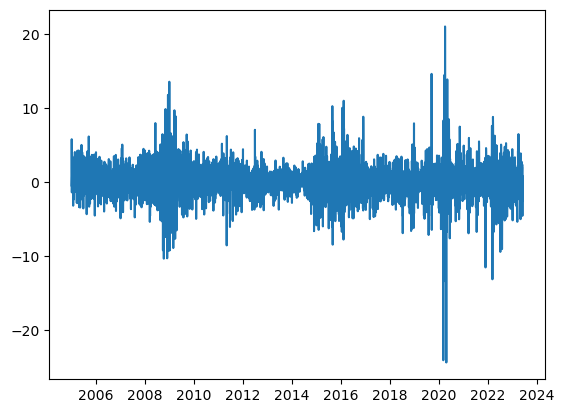

In [47]:
plt.plot(new_target_df.loc[(new_target_df.index<'2023-06-01') & (new_target_df.index>'2005-01-01')])

In [48]:
new_target_df.to_pickle('../Data/Input/New_Targets/input_target_AGG.pkl')

## Indicators with Selected Features

In [50]:
# Feature_selection_1

selected_features = ['GLD', 'SILVER', 'WTI', 'BRENT', 'BY30Y', 'SP500', 'HSI', 'USDCAD', 'USDCHF', 'USDHKD']

# Normalise the price entries for the finance_df
selected_indic = indicators_df.copy()

# Remove all assets not in selected features list
selected_indic = selected_indic[selected_indic.columns[selected_indic.columns.str.startswith(tuple(selected_features))]]

for asset in selected_features:
    
    # Remove high, low and STD for each asset
    selected_indic = selected_indic.drop(columns=[f'{asset}_High',f'{asset}_Low',f'{asset}_STD'])

    # Express RSI as a percentage for more reasonable numbers
    selected_indic[f'{asset}_RSI'] = selected_indic[f'{asset}_RSI']/100

# Save to a file
selected_indic.to_pickle('../Data/Input/Selected_features/input_data_indic.pkl')

selected_indic

,GLD_Return,GLD_MACD,GLD_SIGDIF,GLD_RSI,BRENT_Return,BRENT_MACD,BRENT_SIGDIF,BRENT_RSI,BY30Y_Return,BY30Y_MACD,...,USDCHF_SIGDIF,USDCHF_RSI,USDHKD_Return,USDHKD_MACD,USDHKD_SIGDIF,USDHKD_RSI,WTI_Return,WTI_MACD,WTI_SIGDIF,WTI_RSI
2005-02-22 00:00:00,1.92,0.133567,0.205127,0.544743,4.04,0.813189,0.344715,0.497630,0.75,-0.035410,...,-0.005912,0.389096,0.00,0.001474,-0.000321,0.849951,5.79,0.665699,0.346348,0.499501
2005-02-23 00:00:00,-0.34,0.197634,0.215355,0.529768,-0.23,0.975980,0.406005,0.494651,-0.62,-0.024948,...,-0.006352,0.410726,0.00,0.001382,-0.000330,0.846147,0.04,0.874417,0.444053,0.500002
2005-02-24 00:00:00,-0.21,0.238398,0.204895,0.520880,1.92,1.166589,0.477291,0.519795,0.28,-0.015430,...,-0.005978,0.435450,0.00,0.001287,-0.000341,0.844192,0.43,1.045528,0.492131,0.505635
2005-02-25 00:00:00,0.39,0.281179,0.198142,0.536088,0.34,1.316193,0.501516,0.524271,-0.73,-0.010509,...,-0.005864,0.414203,0.00,0.001205,-0.000338,0.844563,0.19,1.175651,0.497804,0.508240
2005-02-28 00:00:00,0.05,0.313089,0.184041,0.537873,0.91,1.454303,0.511700,0.536111,1.83,0.000247,...,-0.005568,0.410379,-0.01,0.001055,-0.000390,0.826225,0.50,1.284943,0.485676,0.515112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24 00:00:00,-0.81,-0.544642,-0.720740,0.488601,1.98,-0.894984,0.422070,0.487665,0.88,0.061238,...,0.001909,0.497666,-0.10,-0.005234,-0.000980,0.435769,1.96,-0.840738,0.368042,0.494017
2023-05-25 00:00:00,-0.96,-0.840383,-0.813185,0.466990,-2.68,-0.849012,0.374434,0.461391,0.21,0.065244,...,0.001951,0.501786,0.07,-0.004735,-0.000385,0.467601,-3.38,-0.834488,0.299433,0.463429
2023-05-26 00:00:00,0.40,-1.005076,-0.782302,0.476839,0.90,-0.748276,0.380136,0.471077,-0.66,0.065566,...,0.001871,0.500842,-0.02,-0.004426,-0.000060,0.459461,1.17,-0.753074,0.304678,0.474689
2023-05-30 00:00:00,0.62,-1.033311,-0.648430,0.491945,-4.58,-0.932847,0.156452,0.431413,-0.66,0.059327,...,0.001741,0.501812,0.08,-0.004046,0.000256,0.465687,-4.68,-0.936774,0.096782,0.438325


## Future X day Forecasting

In [52]:
# Pivot Assets and make Date the Index
finance_df = input_df.pivot(index='Date', columns='Asset')

# Combine Asset names and variable names
finance_df.columns = finance_df.columns.swaplevel(0, 1)
finance_df.sort_index(axis=1, level=0, inplace=True)
finance_df.columns = ['_'.join(col).strip() for col in finance_df.columns.values]

# Forward fill missing data
finance_df = finance_df.ffill(axis = 0)

# Remove first row to eliminate missing data
finance_df = finance_df[1:]

finance_df

,AGG_High,AGG_Low,AGG_Open,AGG_Price,AGG_Return,BRENT_High,BRENT_Low,BRENT_Open,BRENT_Price,BRENT_Return,...,WTI_High,WTI_Low,WTI_Open,WTI_Price,WTI_Return,XLP_High,XLP_Low,XLP_Open,XLP_Price,XLP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,102.50,102.07,102.46,102.30,-0.0010,41.25,38.81,39.40,41.04,0.0143,...,44.13,41.85,42.18,43.91,0.0425,23.18,22.87,23.01,23.00,-0.0035
2005-01-05,102.35,102.06,102.20,102.26,-0.0004,41.00,39.90,40.80,40.51,-0.0129,...,44.00,42.60,43.90,43.39,-0.0118,23.03,22.88,23.00,22.88,-0.0052
2005-01-06,102.37,102.18,102.29,102.33,0.0007,43.20,39.82,40.43,42.85,0.0578,...,45.75,42.80,43.39,45.56,0.0500,23.07,22.83,22.98,22.99,0.0048
2005-01-07,102.44,102.11,102.39,102.30,-0.0003,43.75,42.20,42.75,43.18,0.0077,...,46.10,44.75,45.50,45.43,-0.0029,23.17,22.98,23.10,23.10,0.0048
2005-01-10,102.32,102.10,102.32,102.25,-0.0005,44.85,42.90,43.20,42.92,-0.0060,...,47.30,45.20,45.60,45.33,-0.0022,23.34,23.05,23.20,23.24,0.0061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22,98.32,97.92,98.17,97.97,-0.0052,77.20,73.59,77.03,74.14,-0.0386,...,72.65,68.93,72.43,69.51,-0.0416,74.38,73.98,74.22,74.27,0.0058
2023-06-23,98.50,98.10,98.49,98.26,0.0030,74.44,72.11,74.02,73.85,-0.0039,...,69.65,67.35,69.53,69.16,-0.0050,74.39,73.74,74.39,73.78,-0.0066
2023-06-26,98.51,98.31,98.50,98.38,0.0012,74.85,73.42,74.50,74.18,0.0045,...,70.11,68.71,69.84,69.37,0.0030,73.91,73.26,73.78,73.88,0.0014


In [53]:
asset = 'GLD'
days_ahead = 20

# Build new target df
new_target_df = pd.DataFrame(finance_df[f'{asset}_Price'].diff(days_ahead).shift(-days_ahead).rename('diff'))
new_target_df['today_price'] = finance_df[f'{asset}_Price']
new_target_df['relative_diff'] = 100*new_target_df['diff']/new_target_df['today_price']

# Remove dates before June 2023
new_target_df = new_target_df[new_target_df.index<'2023-06-01']

# Reduce to the return
new_target_df = pd.DataFrame(new_target_df['relative_diff'])

new_target_df


,relative_diff
Date,
2005-01-04,-1.497426
2005-01-05,-1.195219
2005-01-06,-1.115065
2005-01-07,-0.884321
2005-01-10,-1.620977
...,...
2023-05-26,-0.790405
2023-05-28,-1.774265
2023-05-29,-1.503427


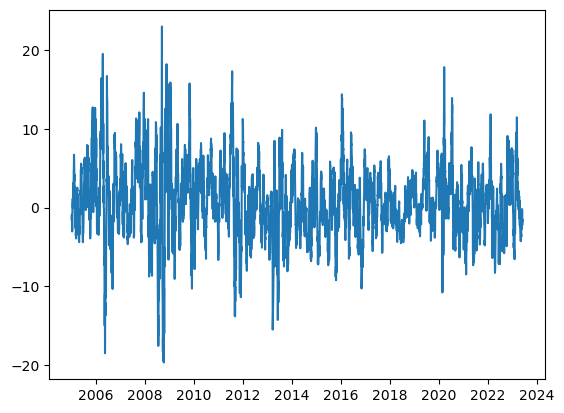

In [54]:
plt.plot(new_target_df.loc[(new_target_df.index<'2023-06-01') & (new_target_df.index>'2005-01-01')])

In [55]:
new_target_df.to_pickle('../Data/Input/Future_Forecast/input_target_GLD_20_day.pkl')